# Minimal model "evenly heated body"
To get started, we will build the simplest possible model. It represents a evenly heated body inside a fluid with constant temperature. The model uses point node elements with lumped parameters.

We want to use Thermca as our main tool, so we import all names in to the global namespace.
A model is build with thermal elements that have to be placed and linked in the context of a Model object:

In [1]:
from thermca import *

model = Model()

Now we create a simple point node element with a defined capacity (capy) and initial temperature:

In [2]:
with model:
    point_body = Node(capy=1., init_temp=0., name='body')

We model the fluid as a boundary condition of the body. This can be done by defining an node element with bound temperature.

In [3]:
with model:
    bound_node = BoundNode(temp=1.)

To complete the boundary condition, we have to connect the node elements. This is done by link elements. Point node elements have to be linked with conductance links. They are used to define a thermal conductance (cond) between the nodes.:

In [4]:
with model:
    CondLink(point_body, bound_node, cond=1.)

After building, we run the model. Therefore, the model has to be transformed in a runnable network. The sim() method is then used to simulate the thermal behaviour over time.:

In [5]:
net = Network(model)
results = net.sim(time_span=[0, 5.])

Simulation run progress, speed as sim. time vs. real time:
 0% 100% done.


Finally, we can get the results. Typically, we want to print the temperature over time. We can use the temp() method of the result object and insert the times we want temperatures for.:

In [6]:
result_times = [.01, .02, .05, .1, .2, .5, 1., 2., 5.]
point_body_temps = results[point_body].temp(result_times)
print('Time       :', ', '.join(f"{ti:0.2f}" for ti in result_times))
print('Temperature:', ', '.join(f"{te:0.2f}" for te in point_body_temps))

Time       : 0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1.00, 2.00, 5.00
Temperature: 0.01, 0.02, 0.05, 0.09, 0.17, 0.37, 0.61, 0.85, 0.99


A more elegant way is to use a Pandas DataFrame. We can get one with the temp_frame method.

In [7]:
df = results[point_body].temp_frame()
df

Temperature,body
Time,
0.000000,0.000000
0.000100,0.000100
0.001100,0.001099
0.011100,0.011039
0.111100,0.105151
0.707320,0.507021
1.508281,0.778648
2.476880,0.915889
3.637344,0.973546


The DataFrame also supports plotting. Note that the axis labels are already set.

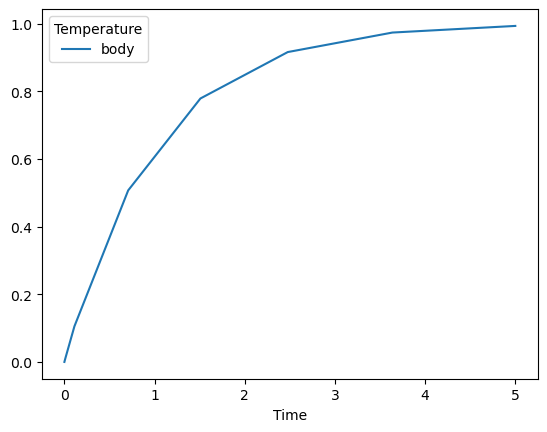

In [8]:
df.plot();